# Exploratory data analysis

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [106]:
#read the main datafile

malt_df=pd.read_csv('malt90_complete_catalog.csv')

#conver the column names to lower case
malt_df.columns = [x.lower() for x in malt_df.columns]
malt_df.columns=malt_df.columns.str.replace('<','')
malt_df.columns=malt_df.columns.str.replace('>','')

In [107]:
# #now change the class variable  to numeric
# malt_df.classification = pd.Categorical(malt_df.classification)
# malt_df['numeric_class'] = malt_df.classification.cat.codes
# malt_df['classification'].value_counts()

# Different category of sources in the catalog 

‘Q’ for quiescent, 1
<br>
‘A’ for protostellar, 2
<br>
‘C’ for compact H II regions, 3
<br>
‘H’ for extended H II regions, 4
<br>
‘P’ for photo-dissociation 5
<br>
‘U’ for uncertain; 

Time Sequence: Q --> A --> C --> H --> P

In [108]:
def score_to_numeric(x):
    if x=='Q':
        return 1
    if x=='A':
        return 2
    if x=='C':
        return 3
    if x=='H':
        return 4
    if x=='P':
        return 5
    if x=='U':
        return 99

In [109]:
malt_df['class_numeric'] = malt_df['classification'].apply(score_to_numeric)
malt_df.class_numeric= pd.to_numeric(malt_df.class_numeric, errors='coerce')

# Detection rates of molecular lines for individual categories

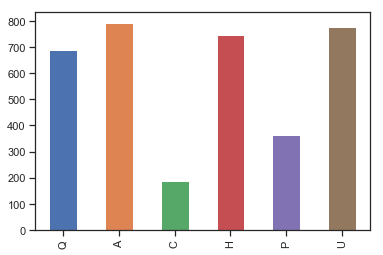

In [110]:
malt_df['classification'].value_counts()[['Q', 'A', 'C', 'H', 'P', 'U']].plot(kind='bar')

# List of molecular lines covered in MALT90 survey

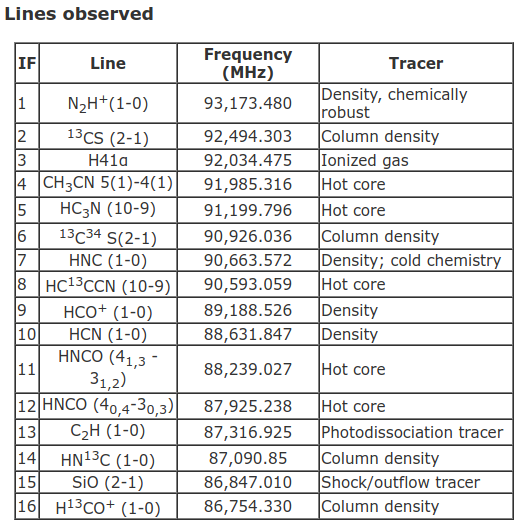

In [111]:
from IPython.display import Image
Image(filename='malt90_observed_lines.png') 

# Detection rate of different molecular lines for individual categories

In [112]:
#choose the columns that contains the intensity of the molecular lines
mol_intensity_cols=list(malt_df.filter(regex='_ii$'))

#dection rates of different molecular lines for individual categories
malt_df.groupby('classification')[mol_intensity_cols].nunique()

,hcop_ii,hnc_ii,n2hp_ii,hcn_ii,h13cop_ii,hn13c_ii,13cs_ii,13c34s_ii,hc13ccn_ii,hnco404_ii,ch3cn_ii,hc3n_ii,hnco413_ii,c2h_ii,sio_ii,h41a_ii
classification,,,,,,,,,,,,,,,,
A,684,676,650,595,294,184,50,3,3,63,37,237,1,416,99,8
C,158,149,127,121,30,20,8,1,2,11,4,21,1,66,16,2
H,645,587,522,568,197,123,68,4,1,46,19,202,1,413,50,12
P,333,301,225,314,76,39,21,2,1,10,5,70,1,247,13,3
Q,543,551,501,454,130,86,12,1,7,86,28,115,1,225,80,2
U,654,581,455,551,109,60,15,4,2,86,15,127,1,246,87,1


Based on this table we removed a few molecules (such as 13cs,	13c34s,	hc13ccn,	ch3cn, hnco413, h41a) that have lower detection rates

In [113]:
selected_cols_for_model=['ag_id', 'hcop_ii', 'hnc_ii', 'n2hp_ii', 'hcn_ii', 'c2h_ii', 'h13cop_ii', 'hn13c_ii', \
                             'hc3n_ii', 'td', 'logng', 'classification' , 'class_numeric']
mol_intensity_cols_filtered=['hcop_ii', 'hnc_ii', 'n2hp_ii', 'hcn_ii', 'c2h_ii',  'hc3n_ii', \
                             'h13cop_ii', 'hn13c_ii']
malt_df_model=malt_df[selected_cols_for_model].copy()

#From now onwards we also dropped the sources with classification tag U
malt_df_model.drop(malt_df_model[malt_df_model.classification == "U"].index, inplace=True)
#malt_df_model.drop(malt_df_model[malt_df_model.classification == "H"].index, inplace=True)
#malt_df_model.drop(malt_df_model[malt_df_model.classification == "P"].index, inplace=True)

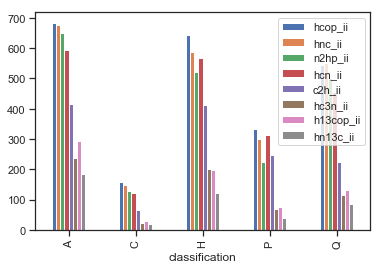

In [114]:
malt_df_model.groupby('classification')[mol_intensity_cols_filtered].nunique().plot(kind='bar')

# Detection rate of Top 8 molecules for individual categories

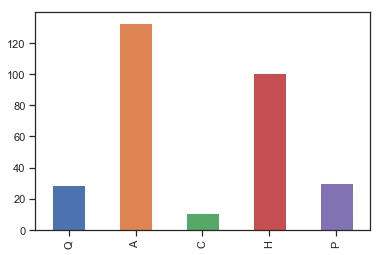

In [115]:
malt_df_model8=malt_df_model[(malt_df_model.hcop_ii>0.0) & ( malt_df_model.hnc_ii>0.0) &\
             (malt_df_model.n2hp_ii>0.0) & (malt_df_model.hcn_ii>0.0)&\
             (malt_df_model.h13cop_ii>0.0) & (malt_df_model.hn13c_ii>0.0)&\
             (malt_df_model.hc3n_ii>0.0) & (malt_df_model.c2h_ii>0.0)]

malt_df_model8['classification'].value_counts()[['Q', 'A', 'C', 'H', 'P']].plot(kind='bar')

# Detection rate of Top 6 molecules for individual categories

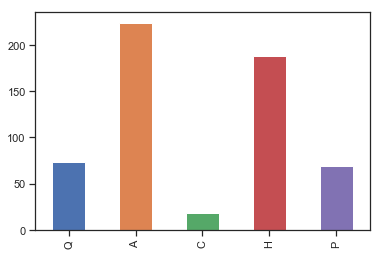

In [116]:
malt_df_model6=malt_df_model[(malt_df_model.hcop_ii>0.0) & ( malt_df_model.hnc_ii>0.0) &\
             (malt_df_model.n2hp_ii>0.0) & (malt_df_model.hcn_ii>0.0)&\
             (malt_df_model.hc3n_ii>0.0) & (malt_df_model.c2h_ii>0.0)]
malt_df_model6['classification'].value_counts()[['Q', 'A', 'C', 'H', 'P']].plot(kind='bar')

# Distribution of different molecular line intensities for individual categories

(0, 55)

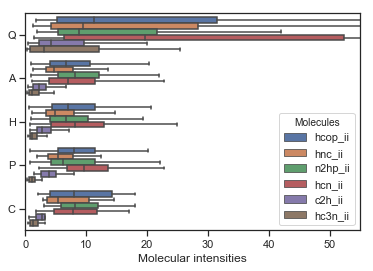

In [117]:
fig, ax = plt.subplots(1)
sns.set(style="ticks", palette="deep")
dd=pd.melt(malt_df_model6,id_vars=['classification'],value_vars=['hcop_ii', 'hnc_ii', 'n2hp_ii', 'hcn_ii', 
                                                                 'c2h_ii',  'hc3n_ii'], var_name='Molecules')
b=sns.boxplot(y='classification',x='value',data=dd,hue='Molecules',showfliers=False)
b.set_xlabel("Molecular intensities")
b.set_ylabel("")
b.set_xlim(0,55)

# Correlation coefficient of different molecular lines

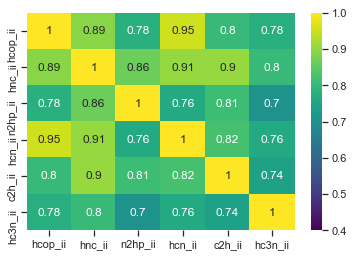

In [118]:
dff=malt_df_model6[['hcop_ii', 'hnc_ii', 'n2hp_ii', 'hcn_ii', 'c2h_ii',  'hc3n_ii']]
fig, ax = plt.subplots(1)
p=sns.heatmap(dff.corr(),cmap='viridis', annot=True, vmin=.4, vmax=1,ax=ax)

# Correlation coefficient of different molecular lines for quiescent sources

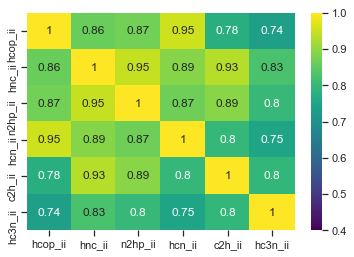

In [119]:
dff=malt_df_model6[malt_df_model6.classification == "Q"]\
[['hcop_ii', 'hnc_ii', 'n2hp_ii', 'hcn_ii', 'c2h_ii',  'hc3n_ii']]
fig, ax = plt.subplots(1)
p=sns.heatmap(dff.corr(),cmap='viridis', annot=True,vmin=.4, vmax=1, ax=ax)

# Correlation coefficient of different molecular lines for protostellar sources

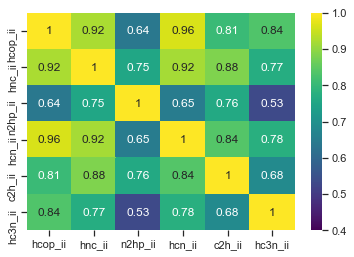

In [120]:
dff=malt_df_model6[malt_df_model6.classification == "A"]\
[['hcop_ii', 'hnc_ii', 'n2hp_ii', 'hcn_ii', 'c2h_ii',  'hc3n_ii']]
fig, ax = plt.subplots(1)
p=sns.heatmap(dff.corr(),cmap='viridis', annot=True, vmin=.4, vmax=1,ax=ax)

# Correlation coefficient of different molecular lines for compact H II regions sources

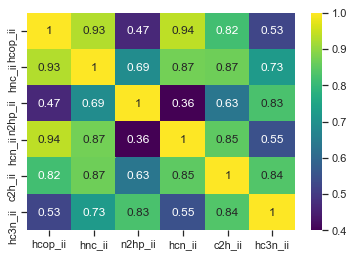

In [121]:
dff=malt_df_model6[malt_df_model6.classification == "C"]\
[['hcop_ii', 'hnc_ii', 'n2hp_ii', 'hcn_ii', 'c2h_ii',  'hc3n_ii']]
fig, ax = plt.subplots(1)
p=sns.heatmap(dff.corr(),cmap='viridis', annot=True,vmin=.4, vmax=1, ax=ax)

# Correlation coefficient of different molecular lines for extended H II regions sources

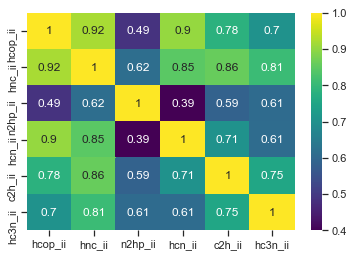

In [122]:
dff=malt_df_model6[malt_df_model6.classification == "H"]\
[['hcop_ii', 'hnc_ii', 'n2hp_ii', 'hcn_ii', 'c2h_ii',  'hc3n_ii']]
fig, ax = plt.subplots(1)
p=sns.heatmap(dff.corr(),cmap='viridis', annot=True,vmin=.4, vmax=1, ax=ax)

# Correlation coefficient of different molecular lines for photo-dissociation sources

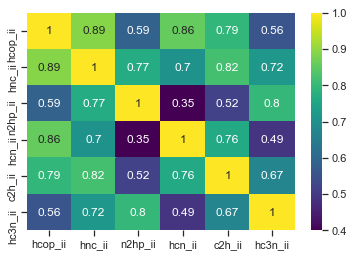

In [123]:
dff=malt_df_model6[malt_df_model6.classification == "P"]\
[['hcop_ii', 'hnc_ii', 'n2hp_ii', 'hcn_ii', 'c2h_ii',  'hc3n_ii']]
fig, ax = plt.subplots(1)
p=sns.heatmap(dff.corr(),cmap='viridis', annot=True,vmin=.4, vmax=1, ax=ax)